# Análisis de crecimiento de usuarios en conversaciones de Twittter.

## Éste notebook es parte del material para el taller de  **análisis de narrativas emergentes, discurso de odio y desinformación en red** desarollado por **Heurística** dentro del projecto DataPolitik.

Permite analizar el crecimiento de los usuarios implicados en una discusión de Twitter.

## Cómo obtener los datos

El tipo de análisis que vamos a desarrollar en este notebook será útil para los casos en que queremos:

- análizar el alcance de una campaña
- monitorear la emergencia o el estancamiento de narrativas

En cada uno de estos casos empezamos con una pregunta más o menos abstracta, el siguiente paso es entender cómo traducir ésta pregunta a una consulta de búsqueda en la API de Twitter.

Se pueden dar dos casos:

 - el tema que queremos estudiar está identificado con un hashtag
 - el tema que queremos estudiar es más amplio y/o difuso.
 
En el primer caso nuestra consulta será simplemente el hashtag en cuestión. 
En el segundo, tendremos que encontrar un conjunto de palabras claves (y de combinaciones entre ellas) que nos permitan capturar una parte representativa de los tweets y retweets sobre el tema. 

Existen varias herramientas para ejecutar consultas a la API de Twitter, en éste caso asumimos que los hemos obtenidos usando el comando [search](https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/#counts) de [twarc2](https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/) y que hemos generado un grafo en formato gexf con el comando [twarc2 network](https://pypi.org/project/twarc-network/).




# Configuración del notebook

La celda siguiente contiene todos los *import* de las librerias necesarias para la sesión y la configuración de estilo para las graficas. 

In [1]:
import networkx as nx
import pandas as pd
import numpy as np

# Carga de datos

En primer lugar, cargamos el conjunto de datos. Por cuestiones de comodidad vamos a cargar los datos en formato de grafo tal y como los generas el plugin [twarc-network](https://pypi.org/project/twarc-network/) y guardados en formato gexf.



In [2]:
G=nx.read_gexf('../datos/grafos/12O_2017.gexf')

creamos un *dataframe* con la lista de usuarios y las fechas de su primera aparición en la discusión.

In [3]:
nodes=pd.DataFrame.from_dict(dict(G.nodes(data="start_date", default=1)),orient='index')

In [4]:
nodes.head()

,0
lamarionamiret,12/10/2017 07:32:34
KRLS,12/10/2017 00:02:39
agustinperezok,12/10/2017 23:59:59
elchiringuitotv,12/10/2017 00:10:50
CarlesFite,12/10/2017 06:05:01


preparamos el *dataframe* de manera que podamos usarlo para graficar el crecimiento de usuarios

In [5]:
nodes[0] = pd.to_datetime(nodes[0],format="%d/%m/%Y %H:%M:%S")

In [6]:
ones=np.ones(len(nodes))
nodes['count']=ones

In [7]:
nodes.set_index(nodes[0], inplace = True)
nu = nodes['count']

nu = nu.sort_index()

creamos una *serie temporal* que represente el crecimiento de usuarios con una granularidad dada, en este ejemplo de horas. Algunos valores admisible son:
- horas: H
- dias: D
- semanas: W

In [8]:
ts=nu.resample('H').sum().cumsum()

<AxesSubplot:xlabel='0'>

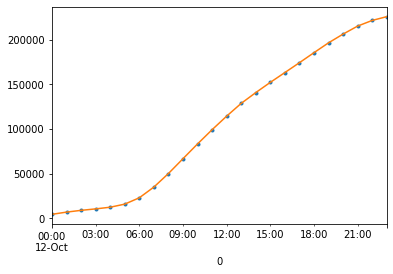

In [9]:
import matplotlib.pyplot as plt
ts.plot(style='.')
ts.plot()
